# Trying Bayes optimization

https://github.com/fmfn/BayesianOptimization<br>
https://github.com/hyperopt/hyperopt

In [23]:
import numpy as np
import sklearn
from matplotlib import pyplot as plt 
from sklearn.metrics import mean_squared_error, r2_score
from hyperopt import hp, tpe, Trials, fmin
from bayes_opt import BayesianOptimization

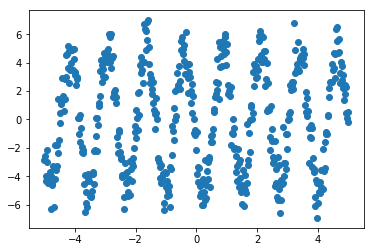

In [78]:
np.random.seed(12345)

n = 500
x_data = np.linspace(-5, 5, num= n)
y_data = 5 * np.cos(5 * x_data + 2) + 1*np.random.normal(size= n)
plt.scatter(x_data, y_data)

In [79]:
def objective(a, w, f):
    """Objective function to minimize"""
    return np.mean((a * np.cos(w*x_data + f) - y_data)**2)

In [80]:
def objective2(args):
    return objective(*args)

In [81]:
# plot objective
omegas = np.linspace(0, 10, 800)
phis = np.linspace(-np.pi, np.pi, 800)
errors = [objective(omega, phi) for omega in omegas]
fig, ax = plt.subplots()
ax.scatter(omegas, errors, label= 'error', color= 'r')

TypeError: objective() missing 1 required positional argument: 'f'

## hyperopt

In [82]:
space = [hp.uniform('a', 0, 10), hp.uniform('w', 0, 10), hp.uniform('f', -np.pi, np.pi)]
tpe_algo = tpe.suggest
tpe_trials = Trials()
tpe_best = fmin(fn=objective2, space=space, algo=tpe_algo, trials=tpe_trials, max_evals=2000)
print(tpe_best)

100%|███████████████████████████████████████████████| 2000/2000 [00:31<00:00, 63.17it/s, best loss: 1.0869231778378663]
{'a': 5.186465288930507, 'f': 2.032923465178648, 'w': 5.007114441332917}


In [83]:
y = tpe_best['a'] * np.cos(tpe_best['w'] * x_data + tpe_best['f'])

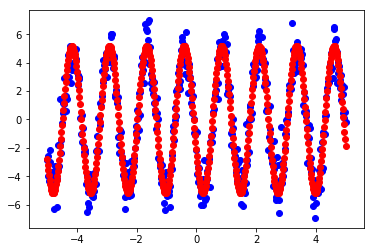

In [84]:
fig, ax = plt.subplots()
ax.scatter(x_data, y_data, label= 'observations', color= 'b')
ax.scatter(x_data, y, label= 'predictions', color= 'r')

## Bayesian optimization (lose)

In [34]:
pbounds = {'w': (0, 10)}

optimizer = BayesianOptimization(
    f=objective_bayes,
    pbounds=pbounds,
    random_state=1,
)

In [36]:
optimizer.maximize(
    init_points=50,
    n_iter=1000,
)

|   iter    |  target   |     w     |
-------------------------------------
|  6        | -1.505    |  0.001144 |
|  7        | -1.015    |  3.023    |
|  8        | -1.053    |  1.468    |
|  9        | -0.992    |  0.9234   |
|  10       | -0.9891   |  1.863    |
|  11       | -0.8926   |  3.456    |
|  12       | -1.165    |  3.968    |
|  13       | -0.4958   |  5.388    |
|  14       | -1.163    |  4.192    |
|  15       | -0.9744   |  6.852    |
|  16       | -0.9889   |  2.045    |
|  17       | -0.9946   |  8.781    |
|  18       | -1.075    |  0.2739   |
|  19       | -0.8859   |  6.705    |
|  20       | -1.172    |  4.173    |
|  21       | -0.9189   |  5.587    |
|  22       | -1.056    |  1.404    |
|  23       | -0.9949   |  1.981    |
|  24       | -0.9413   |  8.007    |
|  25       | -1.056    |  9.683    |
|  26       | -0.9879   |  3.134    |
|  27       | -1.023    |  6.923    |
|  28       | -0.9994   |  8.764    |
|  29       | -0.9539   |  8.946    |
|  30       

KeyboardInterrupt: 